In [37]:
import sys 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
import matplotlib.cm as cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid.inset_locator import inset_axes
sys.path.append('D:\Repositories\PycQED_py3')
from collections import OrderedDict as od
from pycqed.analysis import measurement_analysis as MA 
from pycqed.analysis import analysis_toolbox as a_tools
# from pycqed.analysis_v2 import Spectroscopy as SpecV2
from pycqed.analysis import fitting_models as fit_mods
from scipy import constants
from scipy import optimize
import scipy
import math
import ipywidgets
import pandas as pd
import lmfit
import colorsys as colors
from IPython.display import display
# from nw_plotting_tools import *
# execfile('nw_figure_settings.py')
savedir = 'D:\\Experiments\\1801_Holy_Chip\\Data_Figures\\'
# reload(MA)
# reload(a_tools)

print(savedir)

D:\Experiments\1801_Holy_Chip\Data_Figures\


In [38]:
# %matplotlib nbagg
%matplotlib inline

## Load the data

In [80]:
name = '20180805_Reso_Qi_vs_power'
res_dics = np.load(name+'.npy')

In [81]:
for res_dict in res_dics:
    res_dict['High_power_Qi'] = []
    res_dict['High_power_NPhot'] = []
    res_dict['High_power_field'] = []
    res_dict['Multiple_Photon_Levels_Qi'] = []
    res_dict['Multiple_Photon_Levels_NPhot'] = []
    res_dict['Multiple_Photon_Levels_field'] = []
    for tt, r_dict in enumerate(res_dict['all_results']):
        res_dict['High_power_Qi'].append(r_dict['Qi'][0]) # Qi at high power (large photon number)
        res_dict['High_power_NPhot'].append(r_dict['NPhot'][0]) # Photon number at high power
        if (len(r_dict['NPhot'])>1): # Measurements at multiple photon numbers are stored seperately
            res_dict['Multiple_Photon_Levels_Qi'].append(r_dict['Qi'])  # All the Qi at the various photon number levels
            res_dict['Multiple_Photon_Levels_NPhot'].append(r_dict['NPhot']) # All the photon numbes at the various levels

## Add the coupler lengths

In [82]:
# file :20180805_Reso_Qi_vs_power
coupler_lengths = 200*np.ones(12)

# # file: 20180911_Reso_Qi_vs_power
# coupler_lengths = [184.81294168, 181.61449073, 178.52609694, 175.54217589, 172.65751465, 169.86724145, 
# 167.16679822, 162.01859092, 157.1818137, 152.62903722, 148.33596141, 144.2809816]

In [83]:
for tt, res_dict in enumerate(res_dics):
    res_dict['Coupler_length'] = coupler_lengths[tt]

Text(0.5,1,'$Q_\\mathrm{c}$ vs $f_\\mathrm{R}$ for all resonators')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


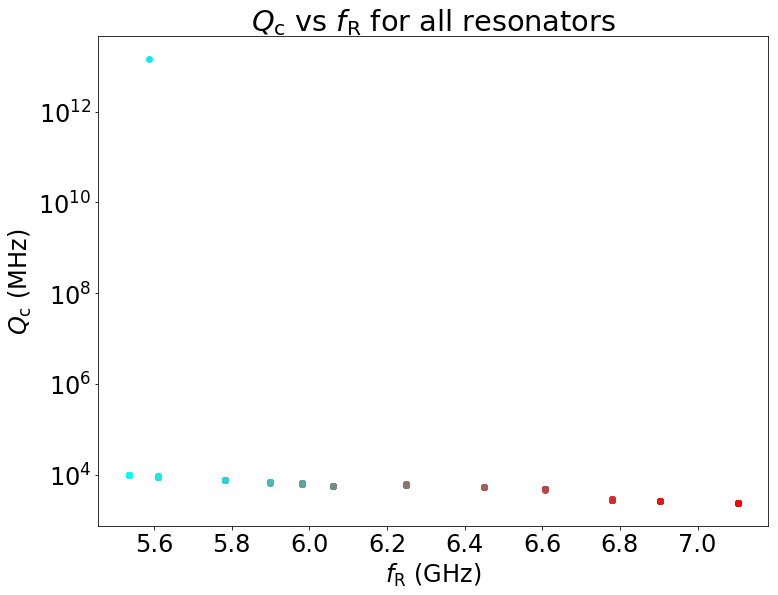

In [84]:
font_size = 24
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : font_size}
matplotlib.rc('font', **font)
matplotlib.rcParams.update({'font.size': font_size})

figr = plt.figure(figsize=(12,9))
ax = figr.add_subplot(111)

for tt, res_dict in enumerate(res_dics):
        ax.semilogy(res_dict['all_results'][0]['f0'],np.array(res_dict['all_results'][0]['Qc']),
                'o',color=res_dict['color'],label=res_dict['plot_label'])    

ax.set_ylabel(r'$Q_\mathrm{c}$ (MHz)')
ax.set_xlabel('$f_\mathrm{R}$ (GHz)')
ax.set_title('$Q_\mathrm{c}$ vs $f_\mathrm{R}$ for all resonators')
# ax.legend(loc='best')#, fontsize=16)
# ax.set_ylim(1e3,1e6)

# Filter the outlier

In [85]:
for kk, res_dict in enumerate(res_dics):
    res_dict['Filtered_Qc'] = []
    res_dict['Fitered_f0'] = []
    for tt, r_dict in enumerate(res_dict['all_results']):
        if r_dict['Qc'][tt]<1e5:
            res_dict['Filtered_Qc'].append(r_dict['Qc'][tt])
            res_dict['Fitered_f0'].append(r_dict['f0'][tt])

Text(0.5,1,'$Q_\\mathrm{c}$ vs $f_\\mathrm{R}$ for all resonators')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1316: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


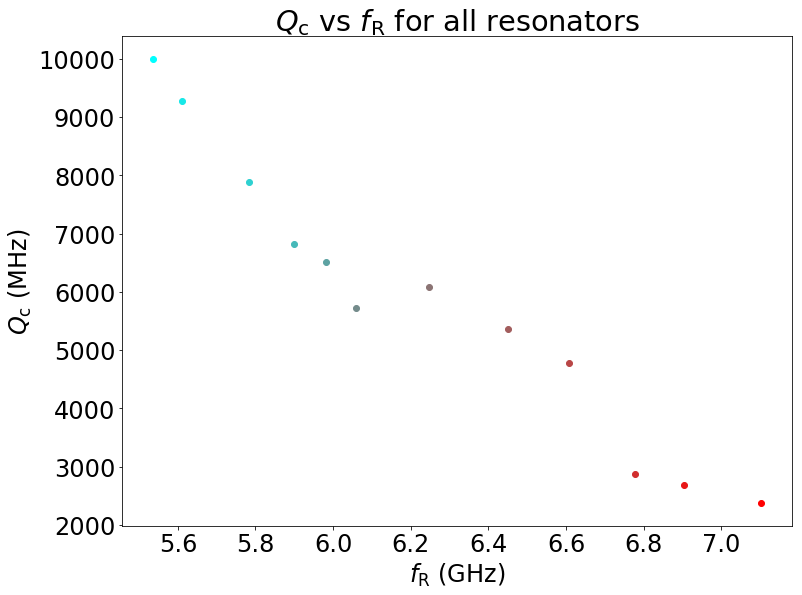

In [86]:
figr = plt.figure(figsize=(12,9))
ax = figr.add_subplot(111)

for tt, res_dict in enumerate(res_dics):
        ax.plot(res_dict['Fitered_f0'],np.array(res_dict['Filtered_Qc']),
                'o',color=res_dict['color'],label=res_dict['plot_label'])  

ax.set_ylabel(r'$Q_\mathrm{c}$ (MHz)')
ax.set_xlabel('$f_\mathrm{R}$ (GHz)')
ax.set_title('$Q_\mathrm{c}$ vs $f_\mathrm{R}$ for all resonators')
# ax.legend(loc='best')#, fontsize=16)
# ax.set_ylim(1e3,1e6)

## Add it to the (new) file

In [87]:
# # make the new file

# Compiled_reso_data = dict()
# Compiled_reso_data[name] = res_dics

# # or open the new file

# Compiled_reso_data = np.load('Compiled_reso_data.npy').item()
# Compiled_reso_data[name] = res_dics

## save the file with the new data added

In [88]:
np.save('Compiled_reso_data.npy',Compiled_reso_data)